In [68]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [69]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [77]:
class simpleCNN(nn.Module):
  def __init__(self):
    super(simpleCNN,self).__init__()
    self.Conv1=nn.Conv2d(in_channels=1,out_channels=8,kernel_size=3,stride=1,padding=1)
    self.Conv2=nn.Conv2d(in_channels=8,out_channels=16,kernel_size=3,stride=1,padding=1)
    self.fc1=nn.Linear(in_features=16*7*7,out_features=10)

     # Dummy forward to find fc1 input features
    dummy_input = torch.zeros(1, 1, 28, 28)
    dummy_out = self._forward_conv(dummy_input)
    n_features = dummy_out.view(1, -1).size(1)
  def _forward_conv(self, x):
    x = F.relu(self.Conv1(x))
    x = F.max_pool2d(x, 2)
    x = F.relu(self.Conv2(x))
    x = F.max_pool2d(x, 2)
    return x

  def forward(self,x):
    x=F.relu(self.Conv1(x))
    x=F.max_pool2d(x,2)

    x=F.relu(self.Conv2(x))
    x=F.max_pool2d(x,2)
    print("Shape before flatten:", x.shape)
    x=x.view(x.size(0),-1)
    x=self.fc1(x)
    return x

In [78]:
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

In [79]:
transform=transforms.Compose([
    transforms.ToTensor()
])

In [80]:
train_dataset = datasets.MNIST(
    root='./data', train=True, download=True, transform=transform)

test_dataset = datasets.MNIST(
    root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [81]:
for images,labels in train_loader:
  print(images.shape)
  print(labels.shape)
  break

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [82]:
model=simpleCNN().to(device)

In [83]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [84]:
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch_idx % 100 == 0:  # print every 100 batches
            print(f"Epoch {epoch+1}/{epochs}, Batch {batch_idx}, Loss: {loss.item():.4f}")

    print(f"Epoch {epoch+1} completed, Avg Loss: {running_loss/len(train_loader):.4f}")


Streaming output truncated to the last 5000 lines.
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Epoch 5/10, Batch 700, Loss: 0.0335
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Siz

In [85]:
correct = 0
total = 0
model.eval()  # Set model to evaluation mode

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')


Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten: torch.Size([64, 16, 7, 7])
Shape before flatten

Shape before flatten: torch.Size([64, 16, 7, 7])


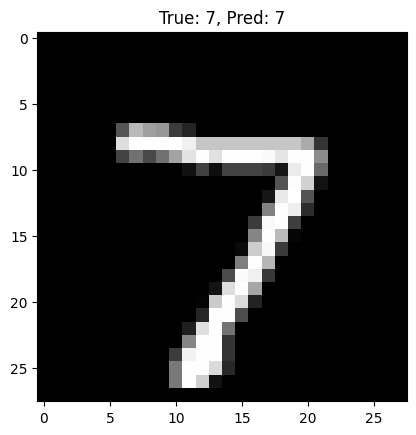

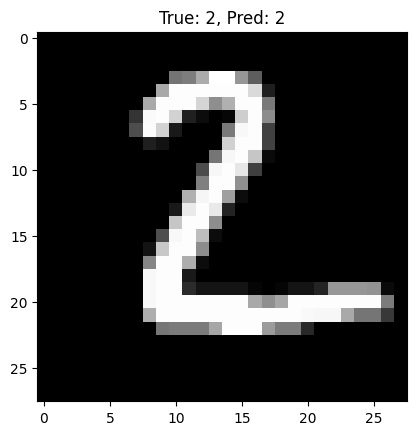

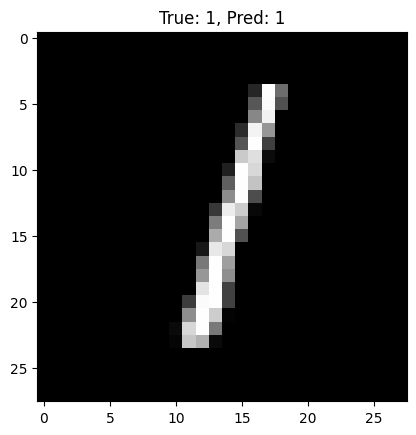

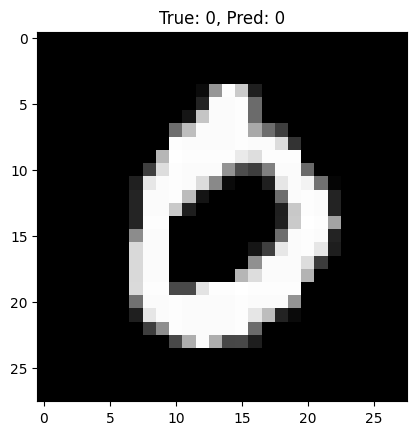

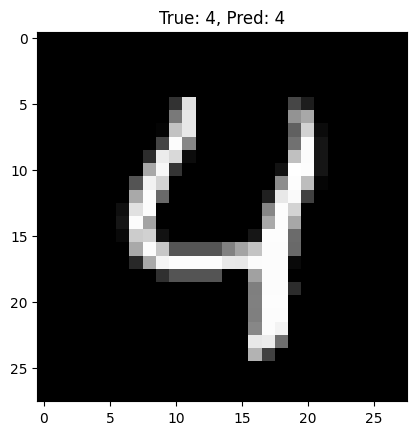

In [86]:
import matplotlib.pyplot as plt

model.eval()
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, preds = torch.max(outputs, 1)

for i in range(5):
    plt.imshow(images[i].cpu().squeeze(), cmap='gray')
    plt.title(f"True: {labels[i].item()}, Pred: {preds[i].item()}")
    plt.show()


In [43]:
from google.colab import files
uploaded = files.upload()


Saving WhatsApp Image 2025-05-21 at 1.09.52 PM.jpeg to WhatsApp Image 2025-05-21 at 1.09.52 PM (1).jpeg


In [45]:
from PIL import Image
import torchvision.transforms as transforms

# Load image (adjust filename if needed)
img = Image.open('WhatsApp Image 2025-05-21 at 1.09.52 PM.jpeg').convert('L')  # 'L' for grayscale

# Resize and transform to match MNIST input (1x28x28)
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor()
])

img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dim

# Predict
model.eval()
with torch.no_grad():
    output = model(img_tensor)
    pred = torch.argmax(output, 1)

print(f"Predicted Label: {pred.item()}")


Predicted Label: 3


In [49]:
model.eval()
with torch.no_grad():
    output = model(img_tensor)
    prediction = torch.argmax(output, dim=1).item()




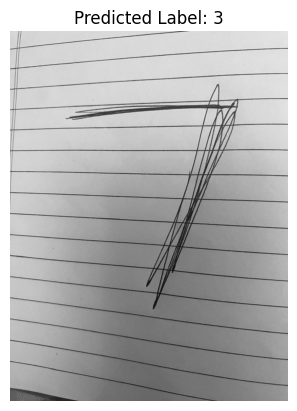

In [50]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap='gray')
plt.title(f"Predicted Label: {prediction}")
plt.axis('off')
plt.show()


In [51]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
])

# Download EMNIST 'digits' split
train_dataset = datasets.EMNIST(
    root='./data', split='digits', train=True, download=True, transform=transform)
test_dataset = datasets.EMNIST(
    root='./data', split='digits', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 562M/562M [00:06<00:00, 90.4MB/s]


In [52]:
class RotatedEMNIST(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __getitem__(self, index):
        img, label = self.dataset[index]
        img = transforms.functional.rotate(img, -90)
        img = transforms.functional.hflip(img)
        return img, label

    def __len__(self):
        return len(self.dataset)

train_loader = DataLoader(RotatedEMNIST(train_dataset), batch_size=64, shuffle=True)
test_loader = DataLoader(RotatedEMNIST(test_dataset), batch_size=64, shuffle=False)


In [53]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


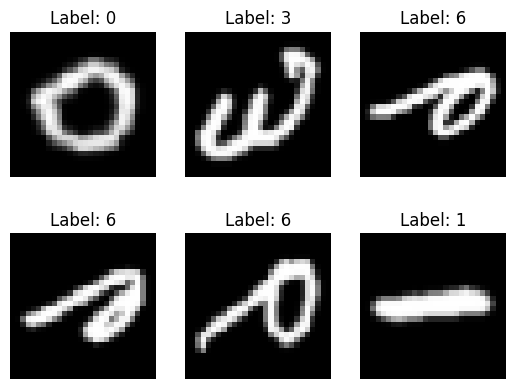

In [56]:
import matplotlib.pyplot as plt

# Show a few EMNIST samples
for img, label in train_loader:
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(img[i][0], cmap="gray")
        plt.title(f"Label: {label[i].item()}")
        plt.axis('off')
    break
plt.show()


In [54]:
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} completed. Avg Loss: {total_loss/len(train_loader):.4f}")


Epoch 1/10 completed. Avg Loss: 0.0466
Epoch 2/10 completed. Avg Loss: 0.0325
Epoch 3/10 completed. Avg Loss: 0.0283
Epoch 4/10 completed. Avg Loss: 0.0254
Epoch 5/10 completed. Avg Loss: 0.0237
Epoch 6/10 completed. Avg Loss: 0.0219
Epoch 7/10 completed. Avg Loss: 0.0209
Epoch 8/10 completed. Avg Loss: 0.0196
Epoch 9/10 completed. Avg Loss: 0.0187
Epoch 10/10 completed. Avg Loss: 0.0179


In [127]:
torch.save(model.state_dict(), "model.pth")


In [128]:
torch.save(model, "full_model.pth")


In [55]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [57]:
from google.colab import files
uploaded = files.upload()

Saving WhatsApp Image 2025-05-21 at 1.47.58 PM.jpeg to WhatsApp Image 2025-05-21 at 1.47.58 PM.jpeg


In [58]:
from google.colab import files
upladed=files.upload()

Saving WhatsApp Image 2025-05-21 at 1.48.00 PM.jpeg to WhatsApp Image 2025-05-21 at 1.48.00 PM.jpeg


In [60]:
from PIL import Image
img_path = list(uploaded.keys())[0]
img = Image.open(img_path).convert('L')  # convert to grayscale



In [61]:
import torchvision.transforms as transforms

preprocess = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.functional.rotate,  # we'll handle rotate + flip separately below
    transforms.ToTensor(),
])

# Manually rotate and flip to match EMNIST orientation
img = img.rotate(-90, expand=True)
img = img.transpose(method=Image.FLIP_LEFT_RIGHT)

# Now convert to tensor
img_tensor = transforms.ToTensor()(img)
img_tensor = img_tensor.unsqueeze(0).to(device)  # add batch dim and send to GPU/CPU


Shape before flatten: torch.Size([1, 16, 7, 7])


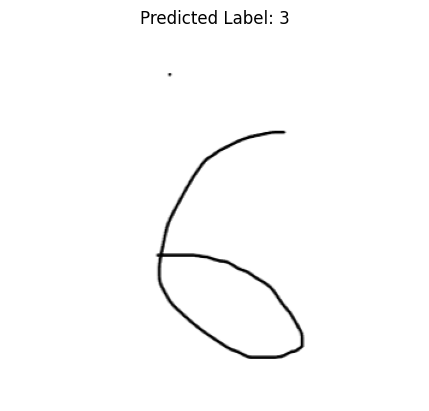

In [94]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch

# Path to your custom image
image_path = '/content/Screenshot 2025-05-21 142146.png'  # replace with your file path

# Transformation: resize, convert to tensor, normalize
transform = transforms.Compose([
    transforms.Grayscale(),                   # Convert to 1 channel (grayscale)
    transforms.Resize((28, 28)),              # Force size to 28x28
    transforms.ToTensor(),                    # Convert to [0,1] range tensor
    transforms.Normalize((0.5,), (0.5,))      # Normalize as during training
])

# Load and transform image
img = Image.open(image_path)
img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension

# Predict
model.eval()
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output.data, 1)
    label = predicted.item()

# Show image and prediction
plt.imshow(img.convert('L'), cmap='gray')
plt.title(f"Predicted Label: {label}")
plt.axis('off')
plt.show()


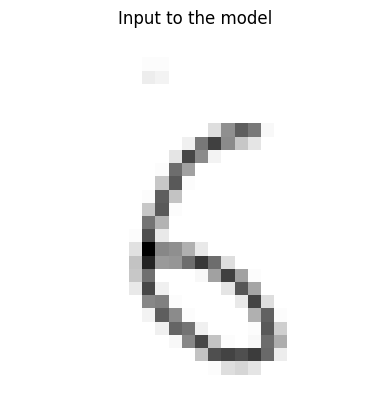

In [95]:
plt.imshow(img_tensor.squeeze().cpu(), cmap='gray')
plt.title("Input to the model")
plt.axis('off')
plt.show()


In [98]:
import cv2
import numpy as np
from PIL import Image

# Load image with OpenCV
img = cv2.imread("/content/Screenshot 2025-05-21 142146.png", cv2.IMREAD_GRAYSCALE)

# Invert if necessary
if np.mean(img) < 127:
    img = 255 - img

# Threshold to binary
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(255 - img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crop to bounding box of digit
x, y, w, h = cv2.boundingRect(contours[0])
digit = img[y:y+h, x:x+w]

# Resize to 28x28
digit = cv2.resize(digit, (28, 28), interpolation=cv2.INTER_AREA)

# Normalize and convert to tensor
digit = digit.astype(np.float32) / 255.0
digit = (digit - 0.5) / 0.5  # normalize to [-1, 1]
digit_tensor = torch.tensor(digit).unsqueeze(0).unsqueeze(0).to(device)

# Predict
model.eval()
with torch.no_grad():
    output = model(digit_tensor)
    _, predicted = torch.max(output.data, 1)
    print(f"Predicted digit: {predicted.item()}")



Shape before flatten: torch.Size([1, 16, 7, 7])
Predicted digit: 3


In [99]:
from google.colab import files
uploaded = files.upload()

Saving kaggle (2).json to kaggle (2).json


In [93]:
from google.colab import files
uploaded = files.upload()

Saving Screenshot 2025-05-21 142146.png to Screenshot 2025-05-21 142146.png


In [103]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [104]:
!kaggle datasets download -d jcprogjava/handwritten-digits-dataset-not-in-mnist


Dataset URL: https://www.kaggle.com/datasets/jcprogjava/handwritten-digits-dataset-not-in-mnist
License(s): CC-BY-SA-4.0
  0% 0.00/54.6M [00:00<?, ?B/s]
100% 54.6M/54.6M [00:00<00:00, 1.37GB/s]


In [105]:
!unzip handwritten-digits-dataset-not-in-mnist.zip -d handwritten_digits


Streaming output truncated to the last 5000 lines.
  inflating: handwritten_digits/dataset/9/9/5499.png  
  inflating: handwritten_digits/dataset/9/9/55.png  
  inflating: handwritten_digits/dataset/9/9/550.png  
  inflating: handwritten_digits/dataset/9/9/5500.png  
  inflating: handwritten_digits/dataset/9/9/5501.png  
  inflating: handwritten_digits/dataset/9/9/5502.png  
  inflating: handwritten_digits/dataset/9/9/5503.png  
  inflating: handwritten_digits/dataset/9/9/5504.png  
  inflating: handwritten_digits/dataset/9/9/5505.png  
  inflating: handwritten_digits/dataset/9/9/5506.png  
  inflating: handwritten_digits/dataset/9/9/5507.png  
  inflating: handwritten_digits/dataset/9/9/5508.png  
  inflating: handwritten_digits/dataset/9/9/5509.png  
  inflating: handwritten_digits/dataset/9/9/551.png  
  inflating: handwritten_digits/dataset/9/9/5510.png  
  inflating: handwritten_digits/dataset/9/9/5511.png  
  inflating: handwritten_digits/dataset/9/9/5512.png  
  inflating: handw

In [107]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split


In [108]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # ensure single channel
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [111]:
!git config --global user.name "Divyansh123456789haha"
!git config --global user.email "divyanshslathia63.com"


In [113]:
!git clone https://github.com/Divyansh123456789haha/digit-recognition-CNN
%cd digit-recognition-CNN


fatal: destination path 'digit-recognition-CNN' already exists and is not an empty directory.
/content/digit-recognition-CNN


In [114]:
torch.save(model.state_dict(), "trained_model.pth")


In [115]:
code = '''
# your entire model training code here
'''
with open("train_model.py", "w") as f:
    f.write(code)


In [116]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

def save_prediction_image(img_tensor, predicted_label, file_name):
    img = TF.to_pil_image(img_tensor.squeeze())
    plt.imshow(img, cmap="gray")
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.savefig(file_name)
    plt.close()


In [117]:


save_prediction_image(img_tensor, predicted.item(), "prediction_1.png")


In [123]:
from getpass import getpass
token = getpass("Enter your GitHub token: ")
!git clone https://github.com/Divyansh123456789haha/digit-recognition-CNN.git


Enter your GitHub token: ··········
Cloning into 'digit-recognition-CNN'...


In [133]:
!rm -rf digit-recognition-CNN



In [134]:
!git clone https://github.com/Divyansh123456789haha/digit-recognition-CNN.git
%cd digit-recognition-CNN


Cloning into 'digit-recognition-CNN'...
/content/digit-recognition-CNN/digit-recognition-CNN


In [135]:
!mv /content/model.pth .
!mv /content/full_model.pth .
!mv /content/Untitled8.ipynb /content/digit-recognition-CNN/



mv: cannot stat '/content/model.pth': No such file or directory
mv: cannot stat '/content/full_model.pth': No such file or directory
mv: cannot stat '/content/Untitled8.ipynb': No such file or directory


In [136]:
!find /content -name "model.pth"
!find /content -name "full_model.pth"
!find /content -name "Untitled8.ipynb"


/content/digit-recognition-CNN/model.pth
/content/digit-recognition-CNN/full_model.pth


In [137]:
!find /content -name "Untitled8.ipynb"
